In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# RUN THE CA TO GENERATE DATA #

rule_number=132
rule = np.binary_repr(rule_number,8)
rule_list = [int(x) for x in str(rule)]
pattern = [[1,1,1],[1,1,0],[1,0,1],[1,0,0],[0,1,1],[0,1,0],[0,0,1],[0,0,0]]

# INITIAL CONDITIONS #

initial_state=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] # initial state
state=[]
states=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
num=len(initial_state)+1
steps=40

# INSERTING BOUNDARY CONDITIONS #

prev_state=initial_state
prev_state.append(0)
prev_state.insert(0,0)

# APPLYING THE EVOLUTION #

for n in range(steps):
    for i in range(1,num):
        neighbors=[prev_state[i-1],prev_state[i],prev_state[i+1]]
        for z in range(len(pattern)):
            if neighbors==pattern[z]:
                state.append(rule_list[z])
    states.append(state)
    prev_state=state.copy()
    state=[]
    if len(prev_state)<num:
        prev_state.insert(0,0)
        prev_state.append(0)

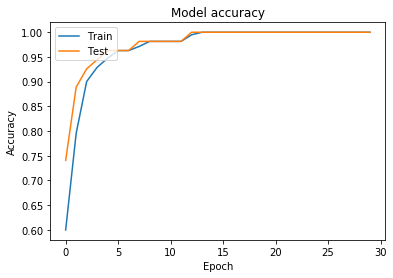

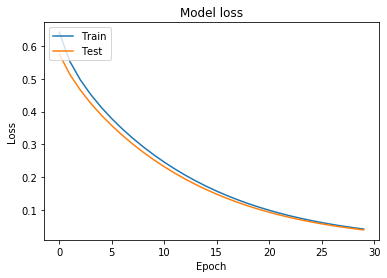

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

# GENERATE THE TRAINING DATA #

x_train=np.array(states[0:20])
y_train=np.array(states[1:21])

# TRAIN THE DATA #

model = Sequential()
model.add(Dense(54, activation='sigmoid', use_bias=True, input_shape=(54,)))
model.add(Dense(54, activation='sigmoid', use_bias=True))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_split=0.1, epochs=30, batch_size=5, verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

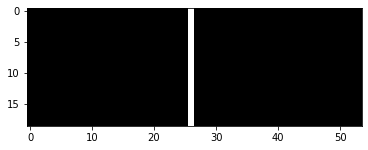

In [34]:
# PREDICT NEXT STATES #

x_test= np.array(states[20:39])
expected= np.array(states[21:40])

predictions = model.predict(x_test, batch_size=32)

# MAKE IT DISCRETE #

for i in range(len(predictions)):
    for j in range(len(predictions[i])):
        if predictions[i,j]<0.5:
            predictions[i,j]=0
        else:
            predictions[i,j]=1
    
imagem=plt.imshow(predictions, cmap='gray')

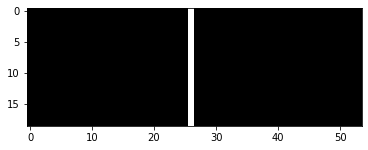

In [35]:
imagem=plt.imshow(expected, cmap='gray')

In [52]:
n=0
y=0
x_temp=[]
x_train_states=[]
while n < 20:
    x_temp=states[n]
    x_train_states.append(x_temp)
    n=n+1
    print(y)

print(len(x_train_states))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
20
